New cases b/w dates 2020-02-05 and 2020-05-05 = 60767
% Contribution of Japan in cases on 2020-05-05: 0.43%
% Contribution of India in cases on 2020-05-05: 1.31%
% Contribution of China in cases on 2020-05-05: 2.37%
% Contribution of Italy in cases on 2020-05-05: 5.98%
% Contribution of Russia in cases on 2020-05-05: 4.1%
% Contribution of Canada in cases on 2020-05-05: 1.71%
Pie repres


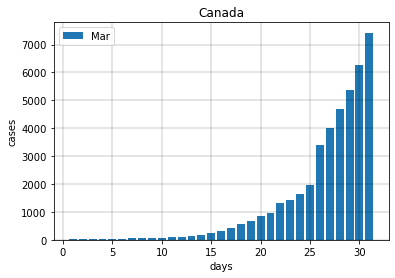

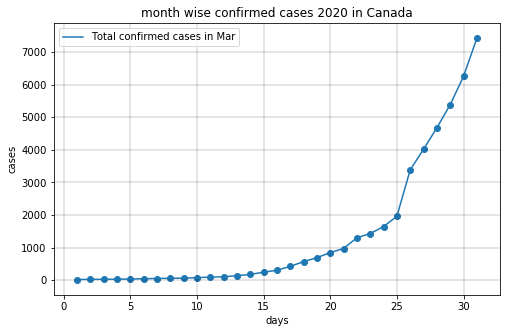

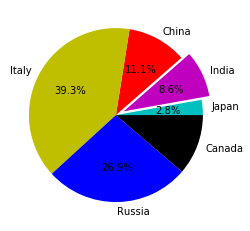

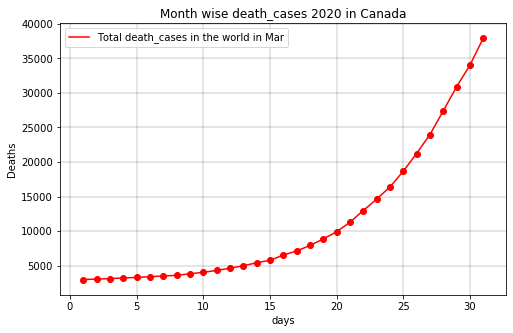

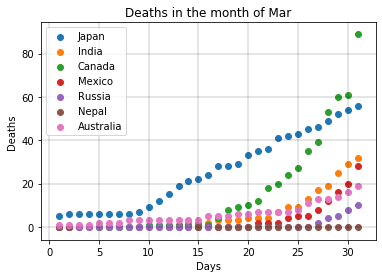

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date

# Load file from here

df=pd.read_csv("total_cases.csv")
df1=pd.read_csv("total_deaths.csv")

#------------------------------------

# User Inputs
Labelcountry='Canada'
country=df.Canada  
date1='2020-02-05'
date2='2020-05-05'
query_of_month='Mar'
countries=[df.Japan,df.India,df.China,df.Italy,df.Russia,df.Canada]
result_label=['Japan','India','China','Italy','Russia','Canada']

#-------------------------------------

day=1

#Graph for total confirmed cases 

def Countries_cases(query_month,country):
    result=[]
    cases=[]
    no_of_days=[]
    global day
    for i in range(len(df['date'])):
        a=df.date[i]
        b=a.split("-")
        datetime_object = datetime.strptime(b[1],"%m")
        month=datetime_object.strftime("%b")
        if(month==query_month):
            cases.append(country[i])
            no_of_days.append(day)
            day=day+1
    result.append(cases)
    result.append(no_of_days)
    day=1
    return result

def Total_death_world(query_month):
    result=[]
    deaths=[]
    no_of_days=[]
    global day
    for i in range(len(df1['date'])):
        a=df1.date[i]
        b=a.split("-")
        datetime_object = datetime.strptime(b[1],"%m")
        month=datetime_object.strftime("%b")
        if(month==query_month):
            deaths.append(df1.World[i])
            no_of_days.append(day)
            day=day+1
    result.append(deaths)
    result.append(no_of_days)
    day=1
    return result


def DeathsinCountries(query_month,country):
    result=[]
    deaths=[]
    no_of_days=[]
    global day
    for i in range(len(df1['date'])):
        a=df1.date[i]
        b=a.split("-")
        datetime_object = datetime.strptime(b[1],"%m")
        month=datetime_object.strftime("%b")
        if(month==query_month):
            deaths.append(country[i])
            no_of_days.append(day)
            day=day+1
    result.append(deaths)
    result.append(no_of_days)
    day=1
    return result

#count new cases b/w two dates

def Casesbwdates(date1,date2,country):
     if date1 is not None and date2 is not None:
            datetime_object = datetime.strptime(df.date[0],"%Y-%m-%d")
            date=datetime_object.strftime("%Y-%m-%d")
            csv_date=df['date']
            for i in range(len(csv_date)):
                if(date1==df.date[i]):
                    index1 = i
                if(date2==df.date[i]):
                    index2=i
            countcases=country[index2]-country[index1]
            return 'New cases b/w dates {} and {} = {}'.format(date1,date2,countcases)
            
print(Casesbwdates(date1,date2,country))

def piecomparisonbwdates(date1,date2,countries):
    countcases=[]
    percentage=[]
    data=[]
    if date1 is not None and date2 is not None:
        datetime_object = datetime.strptime(df.date[0],"%Y-%m-%d")
        date=datetime_object.strftime("%Y-%m-%d")
        csv_date=df['date']
        for i in range(len(csv_date)):
            if(date1==df.date[i]):
                index1 = i
            if(date2==df.date[i]):
                index2=i
        for j in countries:
            val=round(((j[index2])/df.World[index2])*100,2)
            countcases.append(j[index2]-j[index1])
            percentage.append(val)
            val=0
        data.append(countcases)
        data.append(percentage)
        return data

# getting data from functions
pieresult=(piecomparisonbwdates(date1,date2,countries))
pieactivities=['Japan','India','China','Italy','Russia','Canada']
for i in range(len(pieresult[1])):
     print('% Contribution of {} in cases on {}: {}%'.format(result_label[i],date2,pieresult[1][i]))
        

a=Countries_cases(query_of_month,country)
b=Total_death_world(query_of_month)

# bar chart 
plt.rc('grid', linestyle="-", color='black',lw=0.2)
plt.grid(True)
plt.xlabel('days')
plt.ylabel('cases')
plt.title(Labelcountry)
plt.bar(a[1],a[0],label=query_of_month)
plt.legend()

# chart for cases occurred in a particular month
plt.rc('grid', linestyle="-", color='black',lw=0.2)
plt.figure(figsize=(8,5))
plt.grid(True)
plt.xlabel('days')
plt.ylabel('cases')
plt.title('month wise confirmed cases 2020 in {}'.format(Labelcountry))
plt.plot(a[1],a[0],label='Total confirmed cases in {}'.format(query_of_month))
plt.scatter(a[1],a[0])
plt.legend()

# pie chart for cases contribution
plt.figure()
cols=['c','m','r','y','b','k']
plt.pie(pieresult[0],labels=pieactivities,colors=cols,explode=(0,0.1,0,0,0,0),autopct='%1.1f%%')

plt.rc('grid', linestyle="-", color='black',lw=0.2)
plt.figure(figsize=(8,5))
plt.grid(True)
plt.xlabel('days')
plt.ylabel('Deaths')
print('Pie repres')
plt.title('Month wise death_cases 2020 in {}'.format(Labelcountry))
plt.plot(b[1],b[0],label='Total death_cases in the world in {}'.format(query_of_month),color='r')
plt.scatter(b[1],b[0],color='r')
plt.legend()


# scatterplot "number of deaths"

plt.figure()
plt.rc('grid', linestyle="-", color='black',lw=0.2)
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.title('Deaths in the month of {}'.format(query_of_month))
japan=DeathsinCountries(query_of_month,df1.Japan)
india=DeathsinCountries(query_of_month,df1.India)
canada=DeathsinCountries(query_of_month,df1.Canada)
mexico=DeathsinCountries(query_of_month,df1.Mexico)
russia=DeathsinCountries(query_of_month,df1.Russia)
aus=DeathsinCountries(query_of_month,df1.Australia)
nepal=DeathsinCountries(query_of_month,df1.Nepal)
plt.scatter(japan[1],japan[0],label='Japan')
plt.scatter(india[1],india[0],label='India')
plt.scatter(canada[1],canada[0],label='Canada')
plt.scatter(mexico[1],mexico[0],label='Mexico')
plt.scatter(russia[1],russia[0],label='Russia')
plt.scatter(nepal[1],nepal[0],label='Nepal')
plt.scatter(aus[1],aus[0],label='Australia')
plt.legend()




